# 2. Random Numbers and Probability

In this chapter, you'll learn how to generate random samples and measure chance using probability. You'll work with real-world sales data to calculate the probability of a salesperson being successful. Finally, you’ll use the binomial distribution to model events with binary outcomes.

# Calculating probabilities

You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.

Recall that the probability of an event can be calculated by
 
Both pandas as pd and numpy as np are loaded and amir_deals is available.

# Instructions:

Count the number of deals Amir worked on for each product type and store in counts.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

amir_deals = pd.read_csv('amir_deals.csv', index_col=0)

# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64


- Calculate the probability of selecting a deal for the different product types by dividing the counts by the total number of deals Amir worked on. Save this as probs.

In [4]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()

# Calculate probability of picking a deal with each product
probs = counts / len(amir_deals['product'])

print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


# Question

If you randomly select one of Amir's deals, what's the probability that the deal will involve Product C?

Possible answers:

( ) 15%

( ) 80.43%

(x) 8.43%

( ) 22.5%

( ) 124.3%


# Sampling deals

In the previous exercise, you counted the deals Amir worked on. Now it's time to randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.

Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.

Both pandas as pd and numpy as np are loaded and amir_deals is available.

# Instructions:

- Set the random seed to 24.
- Take a sample of 5 deals without replacement and store them as sample_without_replacement.

In [5]:
# Set random seed
np.random.seed(24)


# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5, replace=False)
print(sample_without_replacement)

       product   client status   amount  num_users
128  Product B  Current    Won  2070.25          7
149  Product D  Current    Won  3485.48         52
78   Product B  Current    Won  6252.30         27
105  Product D  Current    Won  4110.98         39
167  Product C      New   Lost  3779.86         11


- Take a sample of 5 deals with replacement and save as sample_with_replacement.

In [6]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

       product   client status   amount  num_users
163  Product D  Current    Won  6755.66         59
132  Product B  Current    Won  6872.29         25
88   Product C  Current    Won  3579.63          3
146  Product A  Current    Won  4682.94         63
146  Product A  Current    Won  4682.94         63


# Question

What type of sampling is better to use for this situation?

Possible answers

( ) With replacement

(x) Without replacement

( ) It doesn't matter

# Creating a probability distribution

A new restaurant opened a few months ago, and the restaurant's management wants to optimize its seating space based on the size of the groups that come most often. On one night, there are 10 groups of people waiting to be seated at the restaurant, but instead of being called in the order they arrived, they will be called randomly. In this exercise, you'll investigate the probability of groups of different sizes getting picked first. Data on each of the ten groups is contained in the restaurant_groups DataFrame.

Remember that expected value can be calculated by multiplying each possible outcome with its corresponding probability and taking the sum. The restaurant_groups data is available. pandas is loaded as pd, numpy is loaded as np, and matplotlib.pyplot is loaded as plt.

# Instructions:

- Create a histogram of the group_size column of restaurant_groups, setting bins to [2, 3, 4, 5, 6]. Remember to show the plot.

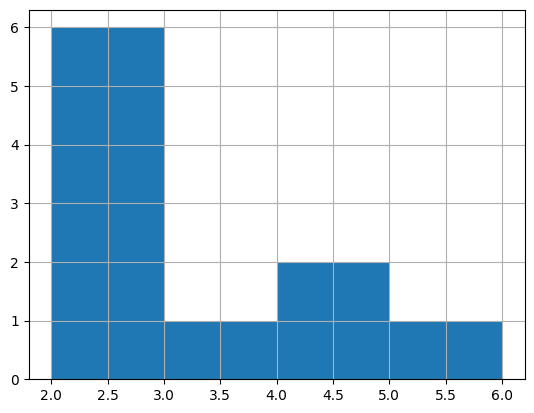

In [8]:
restaurant_groups = pd.read_csv('restaurant_groups.csv')

# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins=[2, 3, 4, 5, 6])
plt.show()

- Count the number of each group_size in restaurant_groups, then divide by the number of rows in restaurant_groups to calculate the probability of randomly selecting a group of each size. Save as size_dist.
Reset the index of size_dist.
Rename the columns of size_dist to group_size and prob.

In [9]:
# Create probability distribution
size_dist = restaurant_groups['group_size'] / restaurant_groups.shape[0]

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

print(size_dist)

   group_size  prob
0           0   0.2
1           1   0.4
2           2   0.6
3           3   0.2
4           4   0.2
5           5   0.2
6           6   0.3
7           7   0.2
8           8   0.4
9           9   0.2


- Calculate the expected value of the size_distribution, which represents the expected group size, by multiplying the group_size by the prob and taking the sum.

In [10]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Calculate expected value
expected_value = (size_dist['group_size'] * size_dist['prob']).sum()
print(expected_value)

2.9000000000000004


- Calculate the probability of randomly picking a group of 4 or more people by subsetting for groups of size 4 or more and summing the probabilities of selecting those groups.

In [11]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = groups_4_or_more['prob'].sum()
print(prob_4_or_more)

0.30000000000000004


# Data back-ups

The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. Use your new knowledge of continuous uniform distributions to model this situation and answer Amir's questions.

# Instructions:

- To model how long Amir will wait for a back-up using a continuous uniform distribution, save his lowest possible wait time as min_time and his longest possible wait time as max_time. Remember that back-ups happen every 30 minutes.

In [12]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

- Import uniform from scipy.stats and calculate the probability that Amir has to wait less than 5 minutes, and store in a variable called prob_less_than_5.

In [13]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform


# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, 0, 30)
print(prob_less_than_5)

0.16666666666666666


- Calculate the probability that Amir has to wait more than 5 minutes, and store in a variable called prob_greater_than_5.

In [14]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, 0, 30)
print(prob_greater_than_5)

0.8333333333333334


- Calculate the probability that Amir has to wait between 10 and 20 minutes, and store in a variable called prob_between_10_and_20.

In [15]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, 0, 30) - uniform.cdf(10, 0, 30)
print(prob_between_10_and_20)

0.3333333333333333


# Simulating wait times

To give Amir a better idea of how long he'll have to wait, you'll simulate Amir waiting 1000 times and create a histogram to show him what he should expect. Recall from the last exercise that his minimum wait time is 0 minutes and his maximum wait time is 30 minutes.

As usual, pandas as pd, numpy as np, and matplotlib.pyplot as plt are loaded.

# Instructions:

- Set the random seed to 334.

In [16]:
# Set random seed to 334
np.random.seed(334)

- Import uniform from scipy.stats.

In [17]:
# Set random seed to 334
np.random.seed(334)

# Import uniform
from cProfile import label
from scipy.stats import uniform

- Generate 1000 wait times from the continuous uniform distribution that models Amir's wait time. Save this as wait_times.

In [18]:
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

print(wait_times)

[ 7.144097    0.97455866  3.72802787  5.11644319  8.70602482 24.69140099
 23.98012075  3.19592668 25.1985306  17.89048629 24.68695356 18.27160808
 22.85829011  0.12929581 15.67789664  2.3262095  15.79151771 21.90473557
 18.25817257 15.78657023 28.74328434  9.38971275 17.0010565   0.95433991
 15.96917606  2.16395679  8.903302   19.24982156  6.52414731 14.10185677
 27.86973455 14.38121016 28.59233824 13.17550521 22.96382405  2.52904371
  6.2163781   8.40217036  4.48079914 28.16365298 19.73302715  3.63959282
  1.74002295  1.5324219  26.97096908 29.37490861  4.71379092  6.44990488
  6.81999564 22.81302458 12.41563042 11.14591581  8.08043184 29.60574053
  3.24571518 19.66709277 13.38939302 29.56433707 24.84697258  6.249684
 15.07668579  5.27474477 27.27430815  2.42084219 27.88317515  0.81231424
  3.48564273 19.80738592  6.11128124 19.10323692  9.12156821 28.31696467
 20.80158047 17.0840986  26.59969632 28.38502685 20.75398728 11.73610958
 20.55950389 18.20349931  4.68857179 17.67638417 29.9

- Create a histogram of the simulated wait times and show the plot.

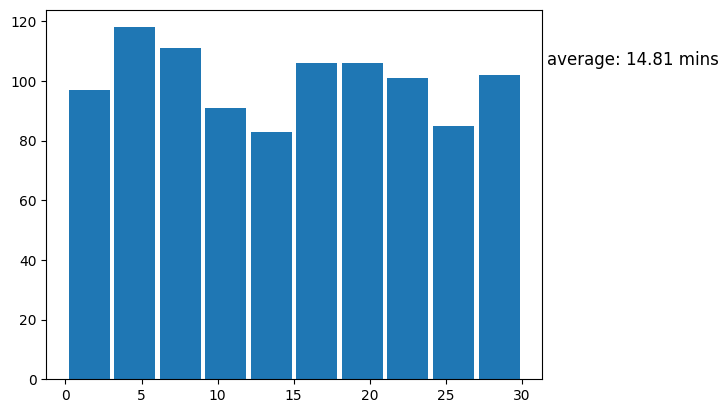

In [19]:
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times, rwidth=0.9)
plt.text(1.01, 0.85, f'average: {np.mean(wait_times):.2f} mins', 
         fontsize=12, transform=plt.gca().transAxes)

plt.show()

# Simulating sales deals

Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. In this exercise, you'll help Amir simulate a year's worth of his deals so he can better understand his performance.

numpy is imported as np.

# Instructions:

- Import binom from scipy.stats and set the random seed to 10.

In [20]:
# Import binom from scipy.stats
from scipy.stats import binom


# Set random seed to 10
np.random.seed(10)

- Simulate 1 deal worked on by Amir, who wins 30% of the deals he works on.

In [21]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate a single deal
print(binom.rvs(1, 0.3, size=1))

[1]


- Simulate a typical week of Amir's deals, or one week of 3 deals.

In [22]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate 1 week of 3 deals
print(binom.rvs(3, 0.3, size=1))

[1]


- Simulate a year's worth of Amir's deals, or 52 weeks of 3 deals each, and store in deals.
- Print the mean number of deals he won per week.

In [25]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size=52)

# Print mean deals won per week
print(np.mean(deals))

0.8269230769230769


# Calculating binomial probabilities

Just as in the last exercise, assume that Amir wins 30% of deals. He wants to get an idea of how likely he is to close a certain number of deals each week. In this exercise, you'll calculate what the chances are of him closing different numbers of deals using the binomial distribution.

binom is imported from scipy.stats.

# Instructions:

- What's the probability that Amir closes all 3 deals in a week? Save this as prob_3.

In [26]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3,3,0.3)

print(prob_3)

0.026999999999999996


- What's the probability that Amir closes 1 or fewer deals in a week? Save this as prob_less_than_or_equal_1.

In [27]:
# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1,3,0.3)

print(prob_less_than_or_equal_1)

0.784


- What's the probability that Amir closes more than 1 deal? Save this as prob_greater_than_1.

In [28]:
# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)

print(prob_greater_than_1)

0.21599999999999997


# How many sales will be won?

Now Amir wants to know how many deals he can expect to close each week if his win rate changes. Luckily, you can use your binomial distribution knowledge to help him calculate the expected value in different situations. Recall from the video that the expected value of a binomial distribution can be calculated by 
.

# Instructions:

- Calculate the expected number of sales out of the 3 he works on that Amir will win each week if he maintains his 30% win rate.
- Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate drops to 25%.
- Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate rises to 35%.

In [29]:
# Expected number won with 30% win rate
won_30pct = 0.3 * 3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 0.25 * 3
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 0.35 * 3
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998
